# Part II - (Prosper Loan Dataset Explanatory Visualization)
## by (Joshua Enam Semanyoh)

## Investigation Overview


> The goal of the presentation is to communicate the effect of specific loan features such as original loan amount, prosper rating and term on a borrower's APR.

The key insights in this presentation are:

> 1. A distribution of borrower APR.

> 2. A distribution of original loan amount.

> 3. A plot showing the relationship between borrower APR and loan amount. 

> 4. A plot showing the relationship between APR and Prosper rating.

> 5. Faceted plots showing the effect of term on the relationship between APR and loan amount.

> 6. Faceted plots showing the effect of prosper rating on relationship between borrower APR and loan amount.

> 7. A plot exploring the relationship between borrower APR, prosper rating and term.


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan; including loan amount, borrower rate (or interest rate), current loan status, borrower income, employment status, listing category, term, prosper rating and many other variables. For this presentation the shape of the dataframe is (84852, 7) as a result of data wrangling and removing of outliers during exploration for efficient analysis and visualization.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper = pd.read_csv('prosperLoanData.csv');

# Create a subset of the dataframe with fewer variables for the investigation

prosper_columns = ['Term', 'LoanStatus', 'BorrowerAPR', 'ProsperRating (Alpha)', 'EmploymentStatus', 'StatedMonthlyIncome', 'LoanOriginalAmount']
prosper = prosper[prosper_columns]

# Drop all rows with null values
prosper.dropna(inplace=True)


# Convert 'ProsperRating (Alpha)' into an ordered categorical datatype from worst to best
prosper_rating = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
p_rating = pd.api.types.CategoricalDtype(ordered=True, categories=prosper_rating);
prosper['ProsperRating (Alpha)'] = prosper['ProsperRating (Alpha)'].astype(p_rating);

# Reset index
prosper = prosper.reset_index(drop=True)

# Display dataframe info
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Term                   84853 non-null  int64   
 1   LoanStatus             84853 non-null  object  
 2   BorrowerAPR            84853 non-null  float64 
 3   ProsperRating (Alpha)  84853 non-null  category
 4   EmploymentStatus       84853 non-null  object  
 5   StatedMonthlyIncome    84853 non-null  float64 
 6   LoanOriginalAmount     84853 non-null  int64   
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 4.0+ MB


## (Distribution of Borrower APR)

> The plot appears to be multimodal. Close to 0.1 there is a small peak, right on both sides of 0.2 there are two more peaks and another peak close to 0.3 mark. There is a very high peak at 0.36. The plot shows that very few Borrower APRs are more than 0.4.

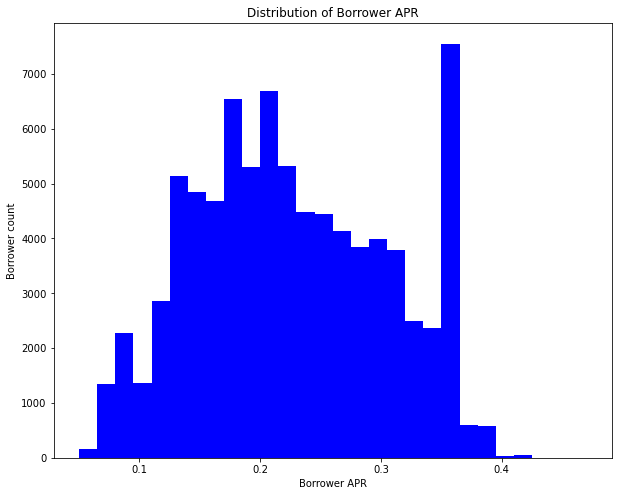

In [3]:
# Add bins to the hist plot for BorrowerAPR 
bins = np.arange(0.05, prosper['BorrowerAPR'].max()+0.05, 0.015)
plt.figure(figsize=[10, 8])
plt.hist(data = prosper, x = 'BorrowerAPR', bins=bins, color='blue');
plt.xlabel('Borrower APR');
plt.ylabel ('Borrower count')
plt.title('Distribution of Borrower APR');

## (Distribution of Original Loan Amount)

> The top three most common original loan amount is 4000,  followed by 15000, then 10000.  The highest loan amount is 35000 and the lowest is 1000;  both of which are the least frequent amounts. We can see that more than half of the original loan amounts are 10000 and below.

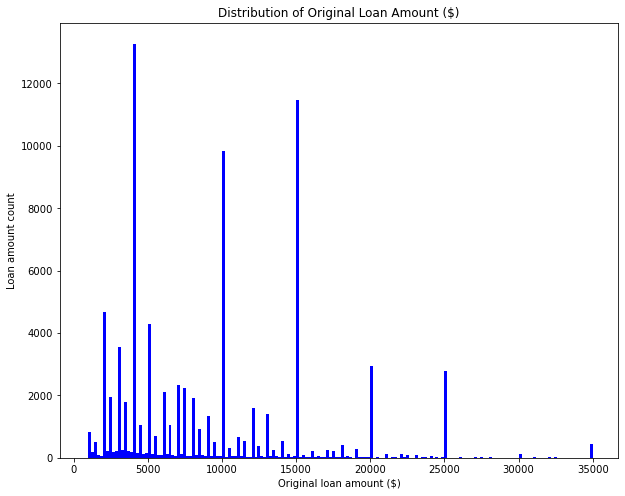

In [4]:
bins = np.arange(800, prosper.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[10, 8])
plt.hist(data = prosper, x = 'LoanOriginalAmount', bins = bins, color='blue');
plt.xlabel('Original loan amount ($)');
plt.ylabel ('Loan amount count');
plt.title('Distribution of Original Loan Amount ($)');

## (Relationship between Borrower APR and Loan Amount)

> From the plot we see that as the loan amount increases the borrower APR range becomes smaller. We observe that loan amounts between 30000 and 35000 have an APR between the range of 0.10 and 0.20.

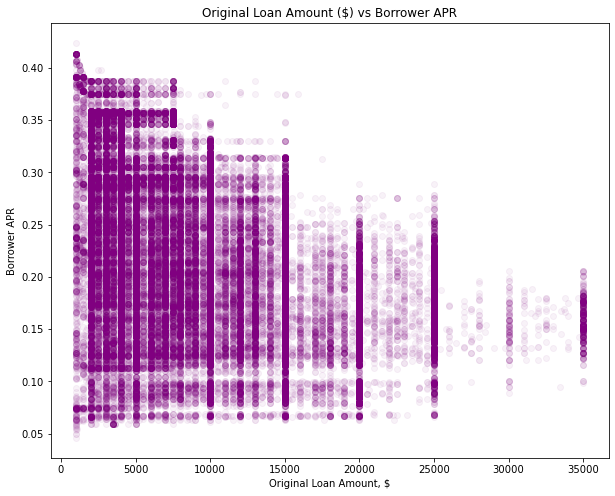

In [5]:
# Scatter plot of Borrower APR against Original Loan Amount
plt.figure(figsize=[10,8]);
plt.scatter(data=prosper, y='BorrowerAPR', x='LoanOriginalAmount', alpha=1/20, color = 'purple');
plt.ylabel('Borrower APR');
plt.xlabel('Original Loan Amount, $');
plt.title('Original Loan Amount ($) vs Borrower APR');

## (Relationship between Borrower APR and Prosper Rating)

> There is a strong correlation between Prosper rating and Borrower APR. The better the Prosper rating, the lower the APR. The median APR for Borrower's with Prosper rating AA is 0.10, although there are some outliers. Overall, the median APR decreases with respect to Prosper Rating from the worst HR to the best rating AA.  The maximum and minimum values keep increasing from AA (best rating) upwards.

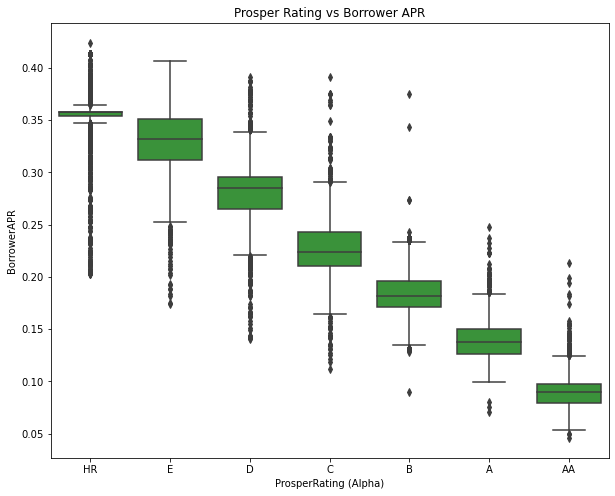

In [6]:
# Boxplot of Prosper rating against Borrower APR
plt.figure(figsize=[10,8]);
base_color=sns.color_palette()[2]
sns.boxplot(data=prosper, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color);
plt.title('Prosper Rating vs Borrower APR');

## (Term Effect on Loan Amount and Borrower APR )

> Overall, the borrower APR range is observed to still reduce as the loan amount increases for all terms. However, for term 60 loans the borrower APR range is seen to be smaller even for smaller loan amounts when compared to terms 36 and 12. 

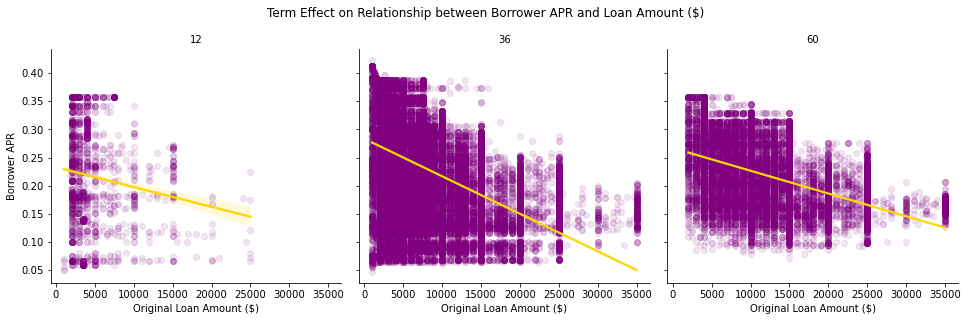

In [7]:
# Use faceting to explore the effect Term can have on the relationship between Borrower APR and loan amount
g=sns.FacetGrid(data=prosper, height=4.5, col='Term', col_wrap=3);
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.01, scatter_kws={'alpha':1/10, 'color': 'purple'}, line_kws={'color':'gold'});
g.set_titles('{col_name}')
g.add_legend();
g.set_xlabels('Original Loan Amount ($)')
g.set_ylabels('Borrower APR')
plt.suptitle('Term Effect on Relationship between Borrower APR and Loan Amount ($)');
plt.subplots_adjust(top=0.85);

## (Effect of Prosper rating on Loan Amount and Borrower APR)

> It is observed that improving Prosper rating (from HR to AA) results in  higher loan amounts and improving (lower) borrower APR. However, we also observe that the correlation between the APR and loan amount becomes slightly positive for A and AA ratings, meaning the APR is likely to increase for people with these ratings when they are taking very high loans. Even then, the APR for A and AA ratings are still the least.

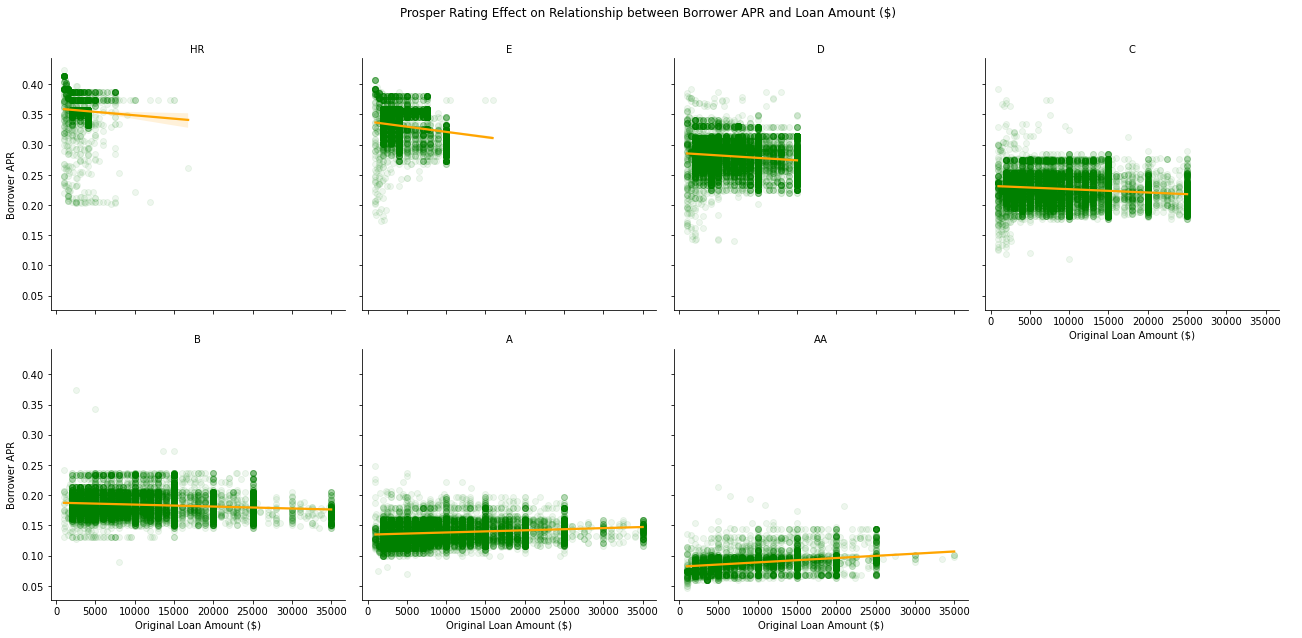

In [8]:
# Use faceting to explore the effect Prosper Rating can have on the relationship between Borrower APR and loan amount
g=sns.FacetGrid(data=prosper, height=4.5, col='ProsperRating (Alpha)', col_wrap=4);
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':1/15, 'color':'green'}, line_kws={'color':'orange'});
g.set_titles('{col_name}')
g.add_legend();
g.set_xlabels('Original Loan Amount ($)')
g.set_ylabels('Borrower APR')
plt.suptitle('Prosper Rating Effect on Relationship between Borrower APR and Loan Amount ($)');
plt.subplots_adjust(top=0.90);

## (Effect of Term on relationship between Prosper Rating and Borrower APR)

> We observe that the borrower APR decreases with the increasing loan term for borrowers with HR to C ratings. However, for people with B to AA ratings, the borrower APR increases with increasing loan term.

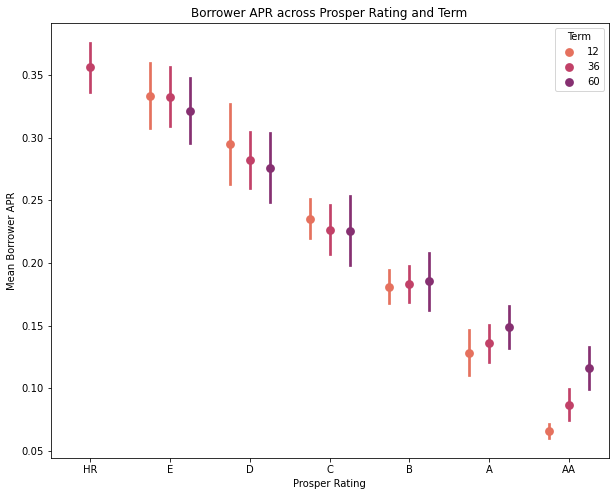

In [9]:
# Explore the relationship between borrower APR, Term and Prosper Rating
fig = plt.figure(figsize = [10,8])
ax = sns.pointplot(data = prosper, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term', palette = 'flare', ci='sd', linestyles = '', dodge = 0.5);
plt.title('Borrower APR across Prosper Rating and Term')
plt.xlabel('Prosper Rating')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Prosper_explanatory_visualization_slide.ipynb --to slides --post serve --no-input --no-prompt